In [2]:
import pyxdf
from utils import sync_streams, combine_streams

Group 7:

Task Begin: Immediately after Chris says "The goal is the work together."
Task End: Immediately before Chris says "All good?."

CSL_LabPC [UNICORN STREAM NOT RECORDED]
Start OBS Vid  UNIX timestamp: 1731681649.925
Task Beginning UNIX timestamp: 1731681857.709 (207 sec in)
Task End       UNIX timestamp: 1731684773.556 (3123 sec in)

CSL_Laptop
Start OBS Vid  UNIX timestamp: 1731681617.114
Task Beginning UNIX timestamp: 1731681857.709 (240 sec in)
Task End       UNIX timestamp: 1731684773.556 (3156 sec in)

HCI_Lab1
Start OBS Vid  UNIX timestamp: 1731681706.594
Task Beginning UNIX timestamp: 1731681857.709 (150 sec in)
Task End       UNIX timestamp: 1731684773.556 (3066 sec in)

HCI_Lab2
Start OBS Vid  UNIX timestamp: 1731681726.646
Task Beginning UNIX timestamp: 1731681857.709 (130 sec in)
Task End       UNIX timestamp: 1731684773.556 (3046 sec in)

In [3]:
group_num = 7
WPI_xdf_path_1 = f"../Group {group_num}/HCILab1-Group7.xdf"
WPI_xdf_path_2 = f"../Group {group_num}/HCILab2-Group7.xdf"
CSL_xdf_path = f"../Group {group_num}/CSL_LabPC_1511.xdf"
WPI_data_streams_1, WPI_header_1 = pyxdf.load_xdf(WPI_xdf_path_1)
WPI_data_streams_2, WPI_header_2 = pyxdf.load_xdf(WPI_xdf_path_2)
WPI_data_streams = WPI_data_streams_1 + WPI_data_streams_2
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)
CSL_data_streams = [stream for stream in CSL_data_streams if stream['info']['name'][0] != 'Unicorn_CSL_LabPC']
video_start_UNIX_times = {
    "OBS_HCILab1": 1731681706.594,
    "OBS_HCILab2": 1731681726.646,
    "OBS_CSL_Laptop": 1731681617.114
}
task_start_UNIX_times = {
    "OBS_HCILab1": 1731681857.709,
    "OBS_HCILab2": 1731681857.709,
    "OBS_CSL_Laptop": 1731681857.709
}
task_duration = 1731684773.556 - 1731681857.709
task_duration

Stream 2: Calculated effective sampling rate 25.5533 Hz is different from specified rate 30.0000 Hz.
Stream 3: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.
Stream 1: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.


2915.8469998836517

length of EEG stream: 807802
start_EEG_index: 40344, end_EEG_index: 769306
padded_start_EEG_index: 31344, padded_end_EEG_index: 778306
actual end EEG index: 737962
For EEG Stream Unicorn_HCILab1, start cutoff index is 9000 and end cutoff index is 737962

length of EEG stream: 763718
start_EEG_index: 61057, end_EEG_index: 790019
padded_start_EEG_index: 52057, padded_end_EEG_index: 799019
actual end EEG index: 711661
[cut short] For EEG Stream Unicorn_HCILab2, start cutoff index is 9000 and end cutoff index is 711661

length of EEG stream: 818370
start_EEG_index: 73539, end_EEG_index: 802501
padded_start_EEG_index: 64539, padded_end_EEG_index: 811501
actual end EEG index: 737962
For EEG Stream Unicorn_CSL_Laptop, start cutoff index is 9000 and end cutoff index is 737962



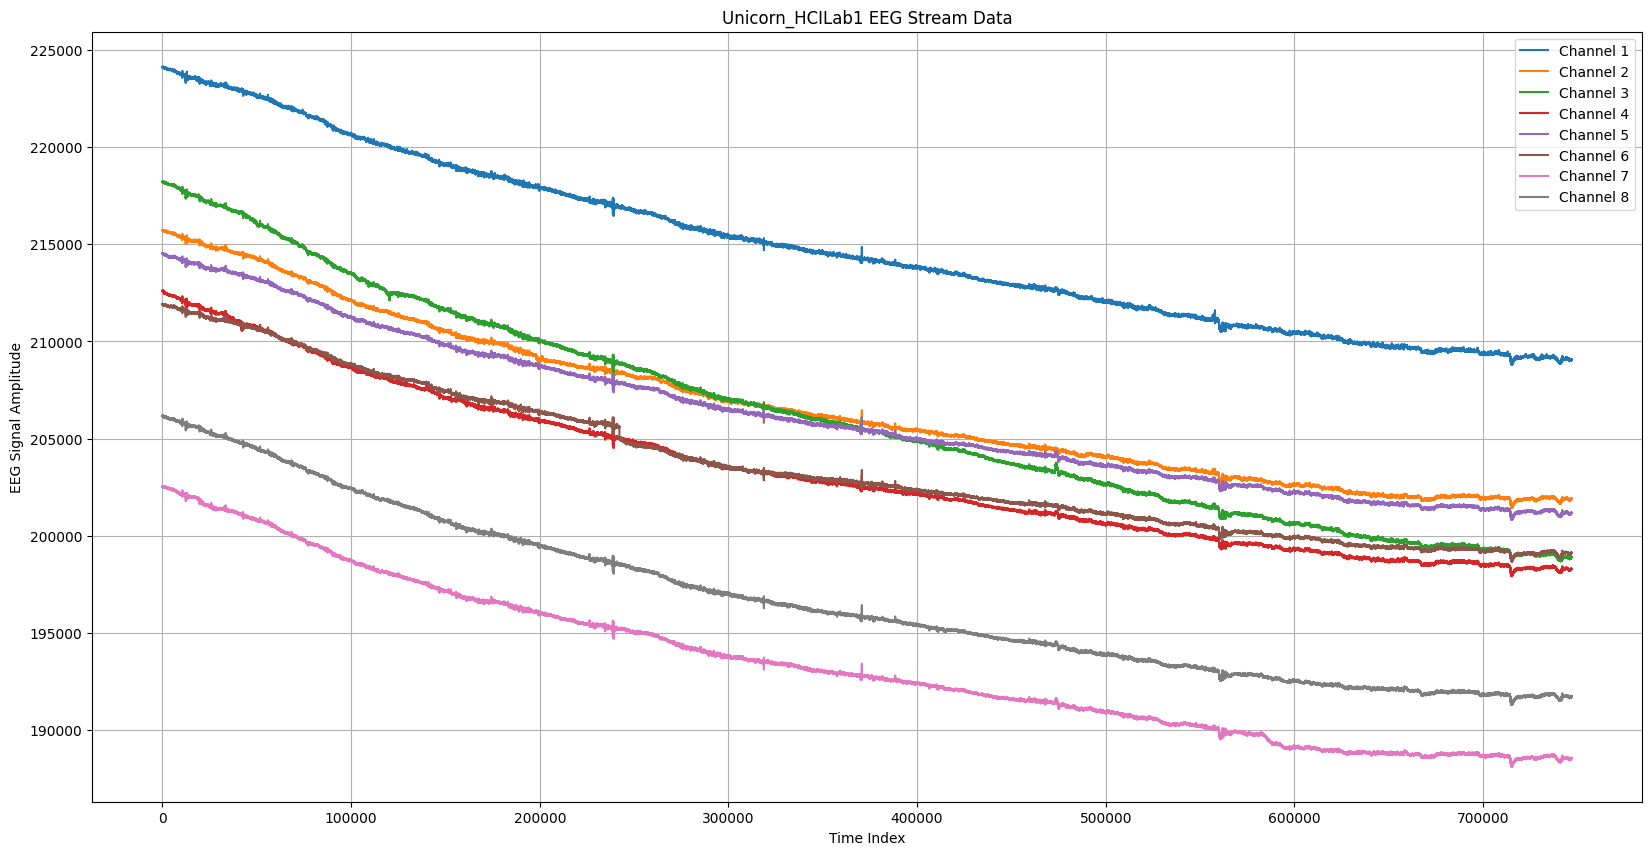

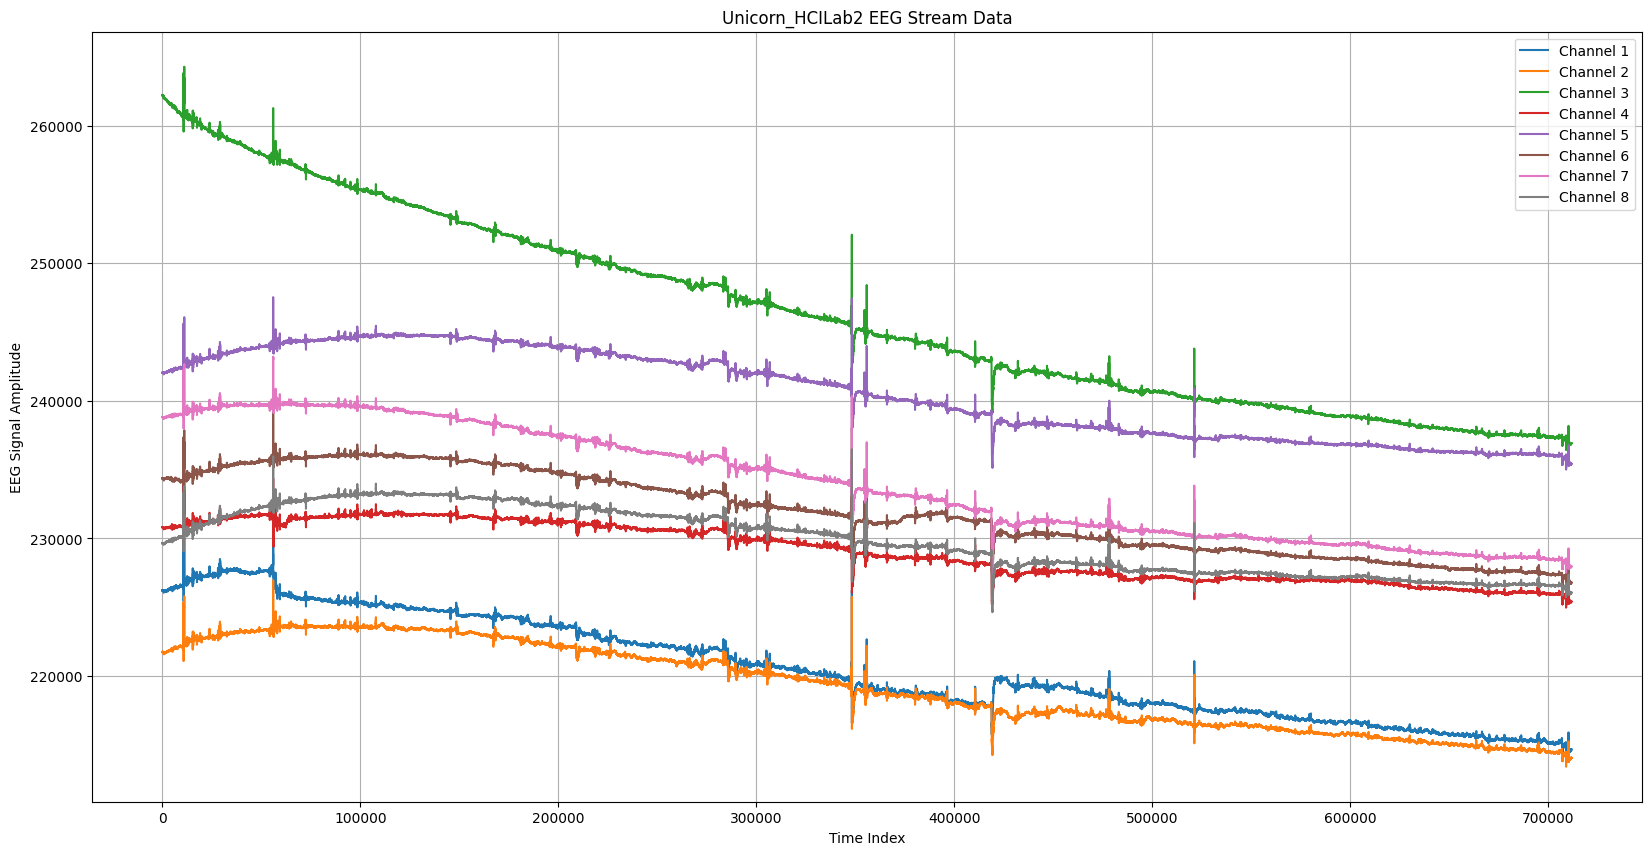

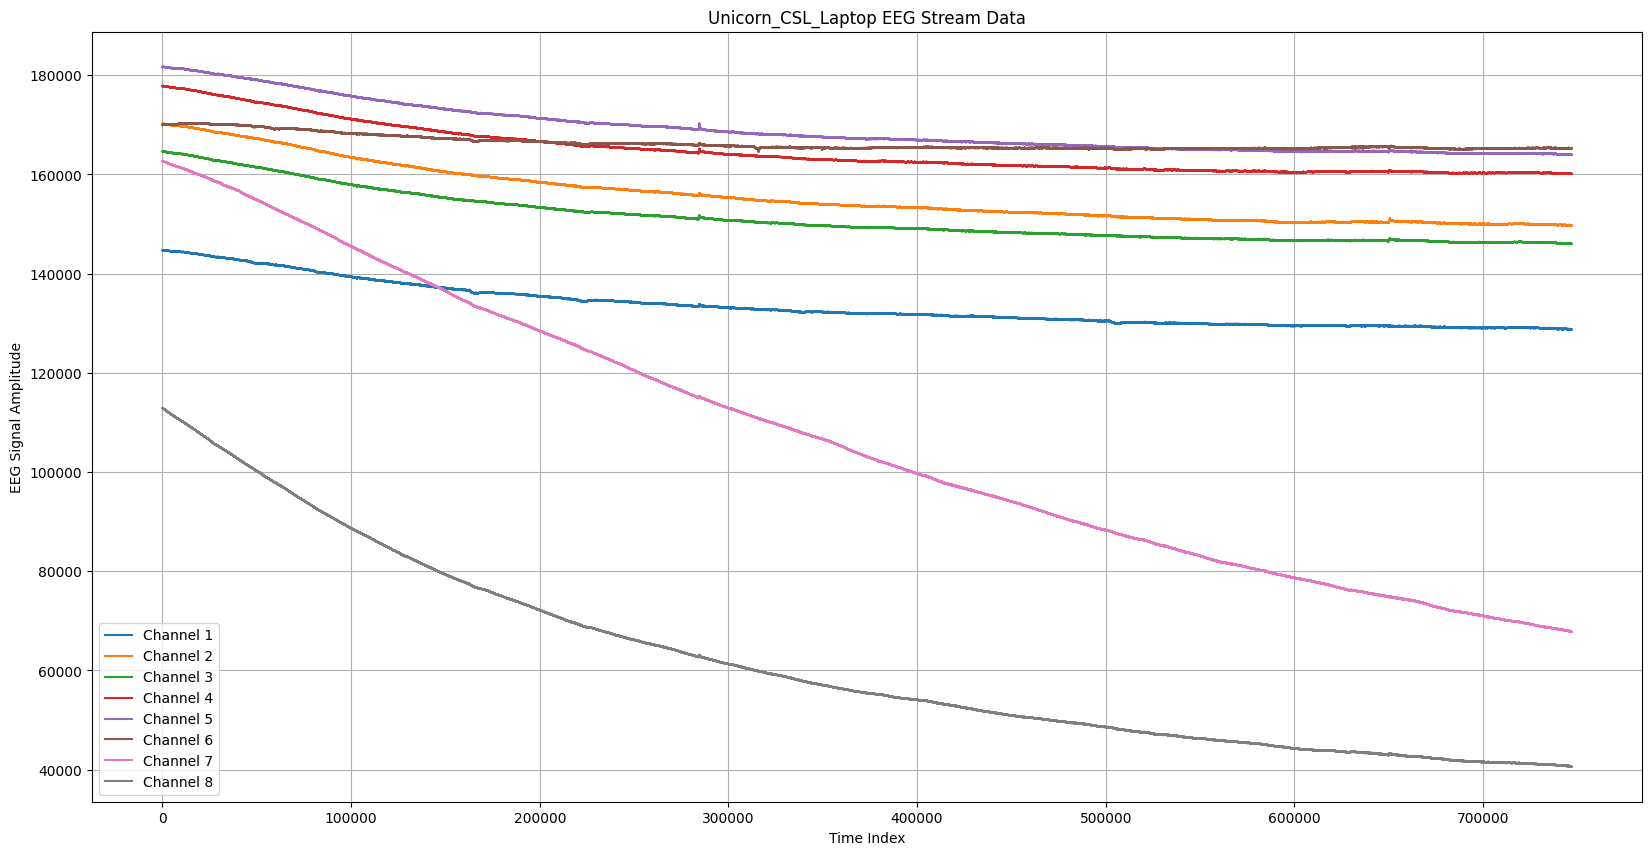

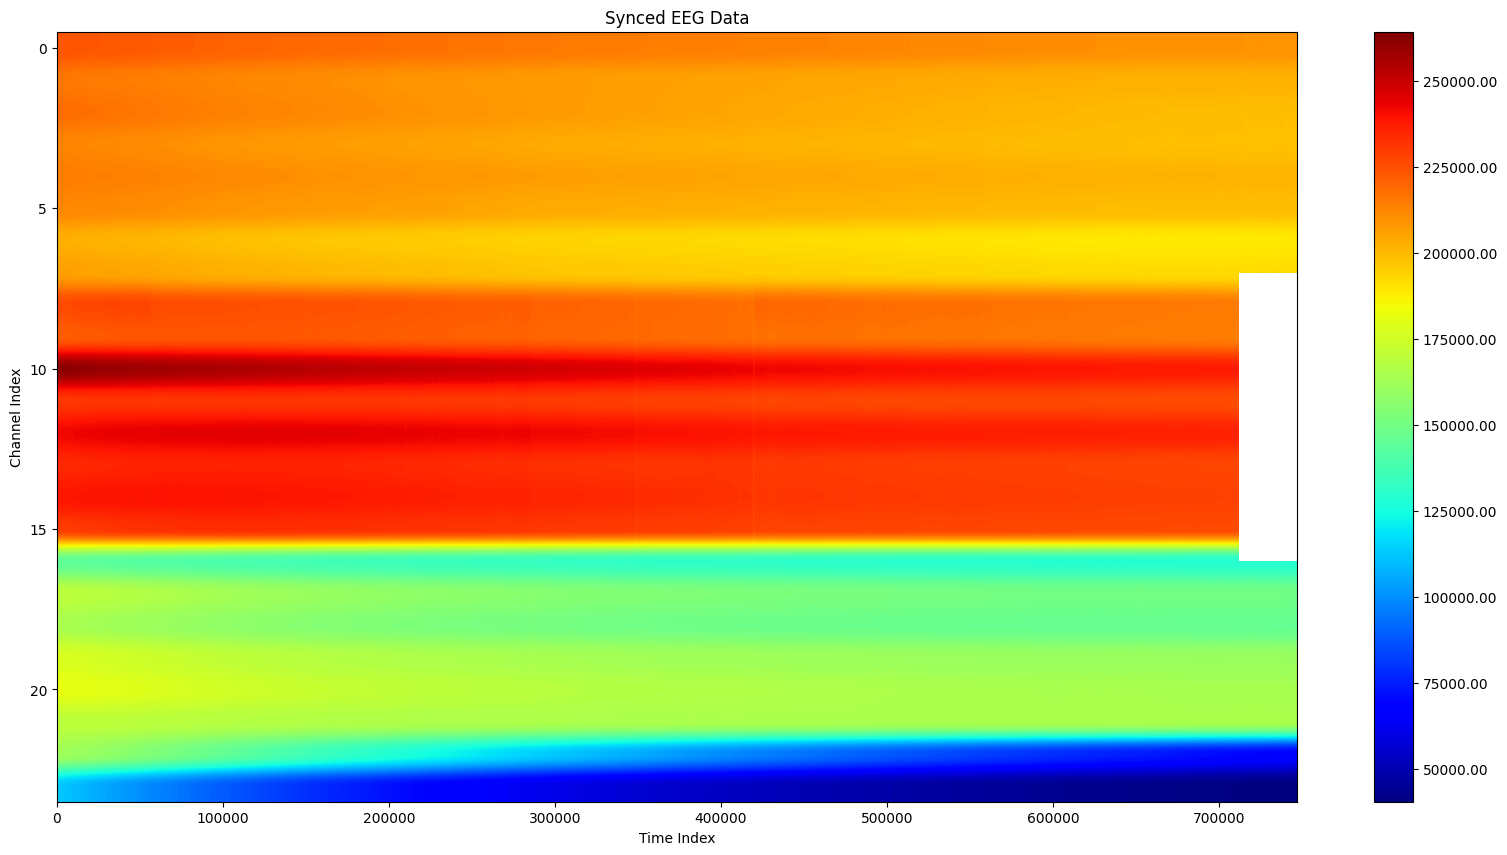

Min: 40587.55078125
Max: 264283.53125
Mean: 190707.1198705843
Standard Deviation: 44941.969556582946


In [4]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams, CSL_data_streams, video_start_UNIX_times, task_start_UNIX_times, task_duration)
combine_streams(group_num, streams)